# Evaluation Playground

This notebook explores a few different metrics by which we can evaluate our segmentation methods.

In [1]:
import numpy as np
np.__version__

'1.13.3'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import skimage.io as io
from skimage.segmentation import felzenszwalb
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

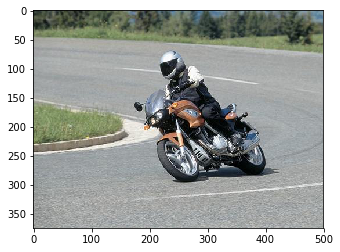

In [4]:
img = io.imread("moto.jpg")
img = img_as_float(img)
plt.imshow(img)

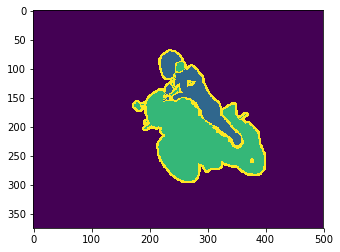

In [5]:
seg_orig = io.imread("moto_seg.png")
_, true_seg = np.unique(seg_orig.reshape(-1, 3), axis=0, return_inverse=True)
true_seg = true_seg.reshape(seg_orig.shape[:2])
plt.imshow(true_seg)

Technically we shouldn't be including the outline pixels in scoring (when using PASCAL VOC, at least).

In [6]:
from sklearn.cluster import KMeans

In [7]:
superpixels = felzenszwalb(img, scale=200, sigma=1.2, min_size=50)
M = np.stack([
    img[superpixels == i].mean(axis=0)
    for i in np.unique(superpixels)
])
clusts = KMeans(3).fit_predict(M)
segments = clusts[superpixels]

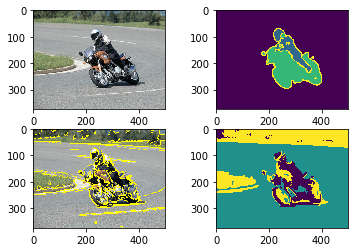

In [8]:
_, axs = plt.subplots(2, 2)

axs[0, 0].imshow(img)
axs[0, 1].imshow(true_seg)
axs[1, 0].imshow(mark_boundaries(img, superpixels))
axs[1, 1].imshow(segments)

# Adjusted Rand Score

From Martial Hebert: https://www.cs.cmu.edu/~hebert/segs.htm

In [9]:
from sklearn.metrics import adjusted_rand_score

In [10]:
adj_rand = adjusted_rand_score(true_seg.flat, segments.flat)
adj_rand

0.2968820743702003

In [11]:
adjusted_rand_score(true_seg.flat, superpixels.flat)

0.15190179374504484

# Mutual Information

In [12]:
from sklearn.metrics import (
    mutual_info_score, 
    adjusted_mutual_info_score,
    normalized_mutual_info_score)

In [13]:
mutual_info = mutual_info_score(true_seg.flat, segments.flat)
adj_mutual_info = adjusted_mutual_info_score(true_seg.flat, segments.flat)
norm_mutual_info = normalized_mutual_info_score(true_seg.flat, segments.flat)

mutual_info, adj_mutual_info, norm_mutual_info

(0.1511165559627326, 0.1831030334970741, 0.21987181435072053)

In [14]:
mutual_info_score(true_seg.flat, superpixels.flat)

0.47661901439822152

# FMI score

In [15]:
from sklearn.metrics import fowlkes_mallows_score

In [16]:
fm = fowlkes_mallows_score(true_seg.flat, segments.flat)
fm

/Users/connor/anaconda/envs/ml_base/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:859: RuntimeWarning: overflow encountered in long_scalars
  return tk / np.sqrt(pk * qk) if tk != 0. else 0.


7.8503008832499264

In [17]:
fowlkes_mallows_score(true_seg.flat, superpixels.flat)

/Users/connor/anaconda/envs/ml_base/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:859: RuntimeWarning: overflow encountered in long_scalars
  return tk / np.sqrt(pk * qk) if tk != 0. else 0.


16.19786977063707

????

# Homogeneity metric

In [18]:
from sklearn.metrics import homogeneity_score

In [19]:
homogeneity = homogeneity_score(true_seg.flat, segments.flat)
homogeneity

0.26400126606828506

In [20]:
homogeneity_score(true_seg.flat, superpixels.flat)

0.83265544553820803

Reversed?

In [21]:
homogeneity_score(segments.flat, true_seg.flat)

0.1831188746396899

In [22]:
homogeneity_score(superpixels.flat, true_seg.flat)

0.18613484128895699